<font size='3'><b>Amazon Forests</b></font>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('amazon.csv',encoding="iso-8859-1",parse_dates=['date'])

In [3]:
#1. Display Top 5 Rows of The Dataset
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
#2. Check Last 5 Rows
df.tail()

In [4]:
#3. Check For Duplicate Data and Drop Them
df.duplicated().sum()

np.int64(32)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#6. Check Null Values In The Dataset
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [8]:
#4. Find Shape of Our Dataset (Number of Rows And Number of Columns)
print(f'DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')

DataFrame has 6422 rows and 5 columns


In [9]:
#5 Total info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6422 non-null   int64         
 1   state   6422 non-null   object        
 2   month   6422 non-null   object        
 3   number  6422 non-null   float64       
 4   date    6422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 301.0+ KB


In [ ]:
#7. Get Overall Statistics About The Dataframe
df.describe()

In [18]:
#8. Rename Month Names To English
df['new_month']=df['month'].map({'Janeiro':'jan',
                                  'Fevereiro':'feb',
                                    'Março':'march',
                                    'Abril':'april',
                                    'Maio':'may',
                                    'Junho':'jun',
                                    'Julho':'july',
                                    'Agosto':'august',
                                    'Setembro':'sep',
                                    'Outubro':'oct',
                                    'Novembro':'nov',
                                    'Dezembro':'dec'})

In [24]:
#9. Total Number of Fires Registered
df1=df.groupby('new_month')['number'].sum().reset_index()

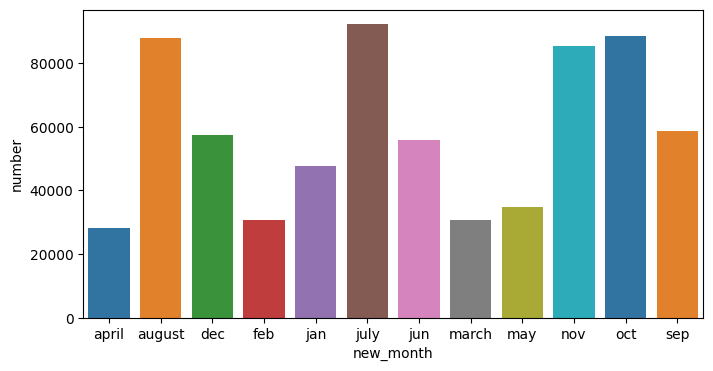

In [108]:
plt.figure(figsize=(8,4))
sns.barplot(data=df1,x='new_month',y='number',hue='new_month',palette='tab10',legend=False,estimator='sum');


In [34]:
#10. In Which Month Maximum Number of Forest Fires Were Reported?
df1[df1['number']==df1['number'].max()]

,new_month,number
5,july,92319.113


In [ ]:
#11. In Which Year Maximum Number of Forest Fires Was Reported?

In [36]:
df2=df.groupby('year')['number'].sum().reset_index()

In [37]:
df2[df2['number']==df2['number'].max()]

,year,number
5,2003,42760.674


<Axes: xlabel='year', ylabel='number'>

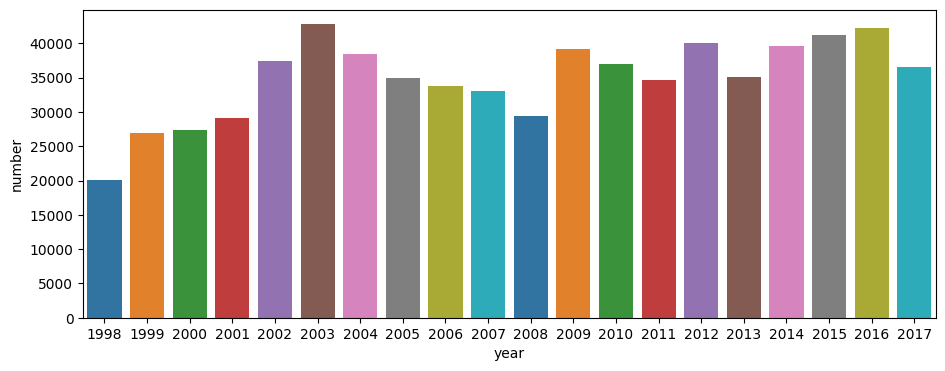

In [107]:
plt.figure(figsize=(11,4))
sns.barplot(data=df2,x='year',y='number',hue='year',palette='tab10',legend=False,estimator='sum')

In [41]:
#12. In Which State Maximum Number of Forest Fires Was Reported?
df3=df.groupby('state')['number'].sum().reset_index()

In [42]:
df3[df3['number']==df3['number'].max()]

,state,number
10,Mato Grosso,96246.028


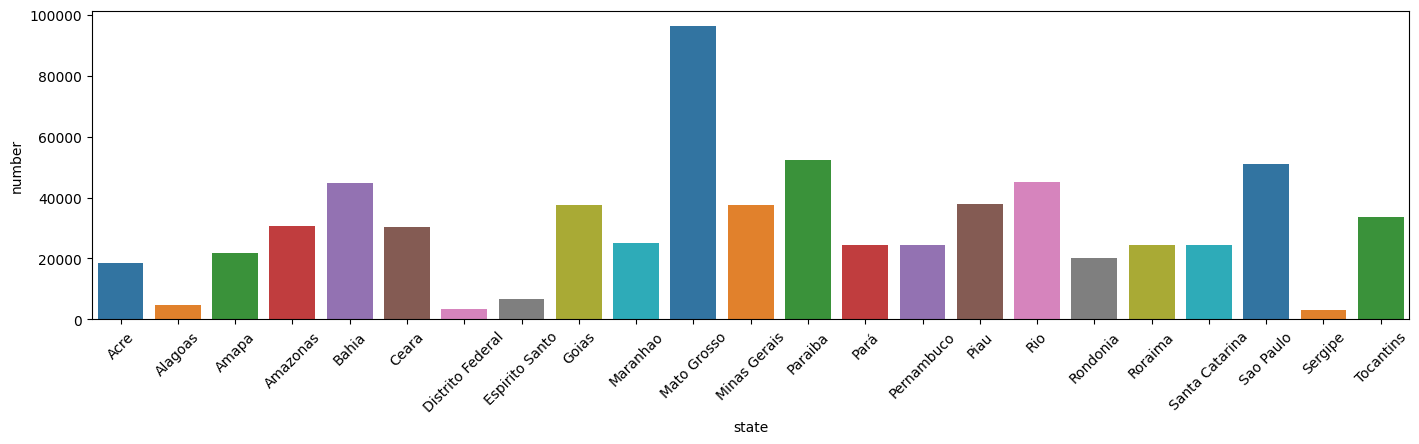

In [106]:
plt.figure(figsize=(17,4))
sns.barplot(data=df3,x='state',y='number',hue='state',palette='tab10',legend=False,estimator='sum')
plt.xticks(rotation=45);

In [49]:
#13. Find Total Number of Fires Were Reported In Amazonas
df3[df3['state']=='Amazonas']['number']

3    30650.129
Name: number, dtype: float64

In [55]:
#14. Display Number of Fires Were Reported In Amazonas (Year-Wise)
df4=df.groupby(['year','state'])['number'].sum().reset_index()

In [59]:
df4[df4['state']=='Amazonas']

,year,state,number
3,1998,Amazonas,946.000
26,1999,Amazonas,1061.000
49,2000,Amazonas,853.000
72,2001,Amazonas,1297.000
95,2002,Amazonas,2852.000
118,2003,Amazonas,1524.268
141,2004,Amazonas,2298.207
164,2005,Amazonas,1657.128
187,2006,Amazonas,997.640
210,2007,Amazonas,589.601


In [95]:
#15. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
df6=df[df['year']==2005][['new_month','number']]

In [96]:
df6.groupby('new_month').sum()

,number
new_month,
april,1011.000
august,4625.403
dec,1843.515
feb,2153.000
jan,3223.768
july,4903.770
jun,3519.294
march,1706.000
may,1570.641


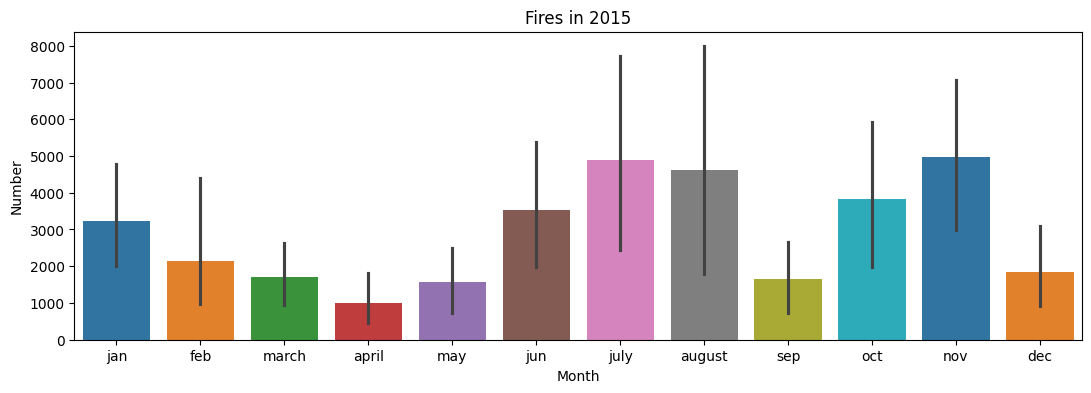

In [105]:
plt.figure(figsize=(13,4))
sns.barplot(data=df6,x='new_month',y='number',hue='new_month',palette='tab10',legend=False,estimator='sum')
plt.title('Fires in 2015')
plt.xlabel('Month')
plt.ylabel('Number');

In [122]:
#16. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
df7=df[['state','number']]
df7=df7.groupby('state').mean()['number'].sort_values(ascending=False).reset_index()


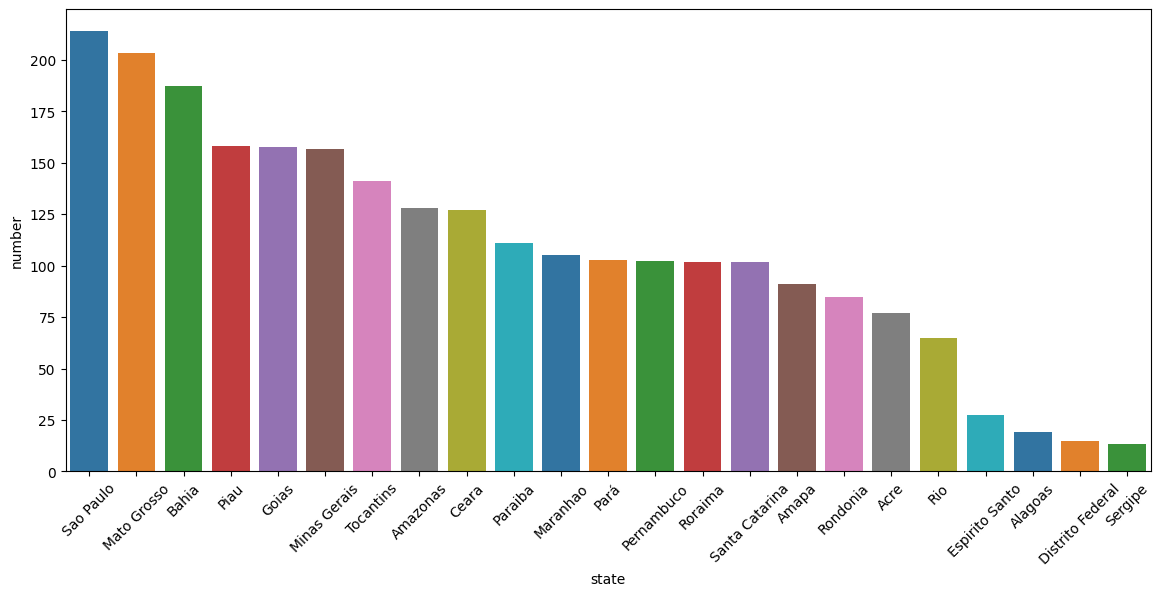

In [123]:
plt.figure(figsize=(14,6))
sns.barplot(data=df7,x='state',y='number',estimator='mean',hue='state',palette='tab10',legend=False)
plt.xticks(rotation=45);

In [ ]:
#17.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [126]:
df[df['new_month']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)